In [132]:
import numpy as np
import matplotlib.pyplot as   plt
import pandas as pd
%matplotlib inline
import seaborn as sns
!pip install opendatasets
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



### Exploratory Data Analysis (EDA) - Student Performance Dataset

In [133]:
dataset_url = 'https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data'
# Download the dataset
od.download(dataset_url)
username = "adehusen"
key_kaggle= "005bff2933fd3d8c7380bd59a1ebf3ef"


Skipping, found downloaded files in "./student-habits-vs-academic-performance" (use force=True to force download)


In [134]:
file_path = '/content/student-habits-vs-academic-performance/student_habits_performance.csv'
df = pd.read_csv(file_path)
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

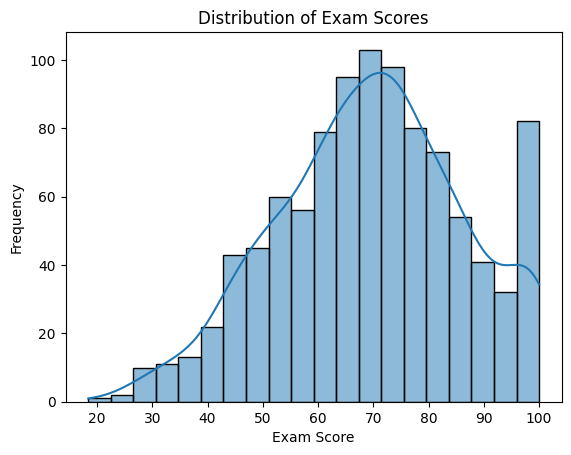

In [136]:
#Distribusi Nilai Ujian

sns.histplot(data=df, x='exam_score', kde=True, bins=20)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

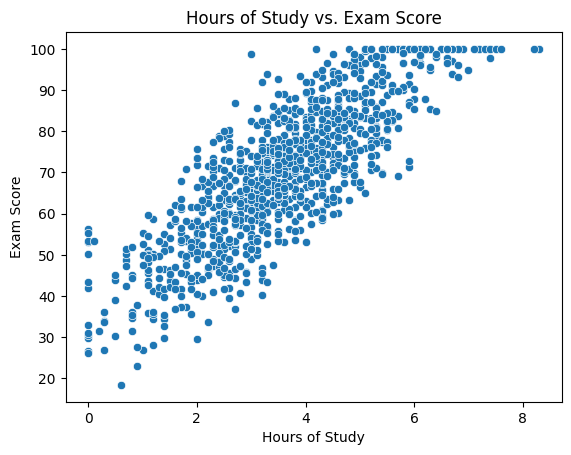

In [137]:
## Jam Belajar vs Nilai Ujian

sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Hours of Study vs. Exam Score')
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.show()

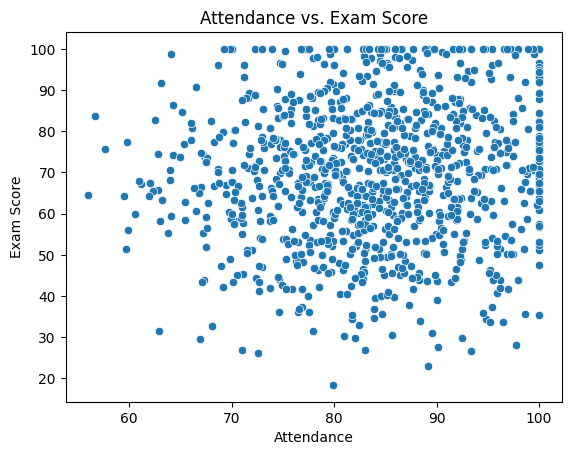

In [138]:
# Kehadiran vs Nilai Ujian

sns.scatterplot(data=df, x='attendance_percentage', y='exam_score')
plt.title('Attendance vs. Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()

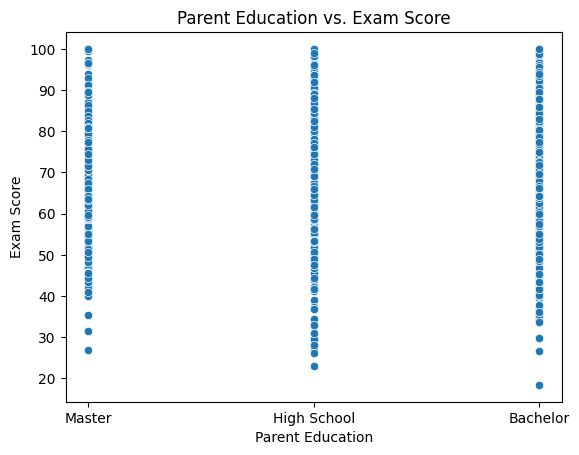

In [139]:
# Pendidikan orang tua dengan nilai ujian

sns.scatterplot(data=df, x='parental_education_level', y='exam_score')
plt.title('Parent Education vs. Exam Score')
plt.xlabel('Parent Education')
plt.ylabel('Exam Score')
plt.show()

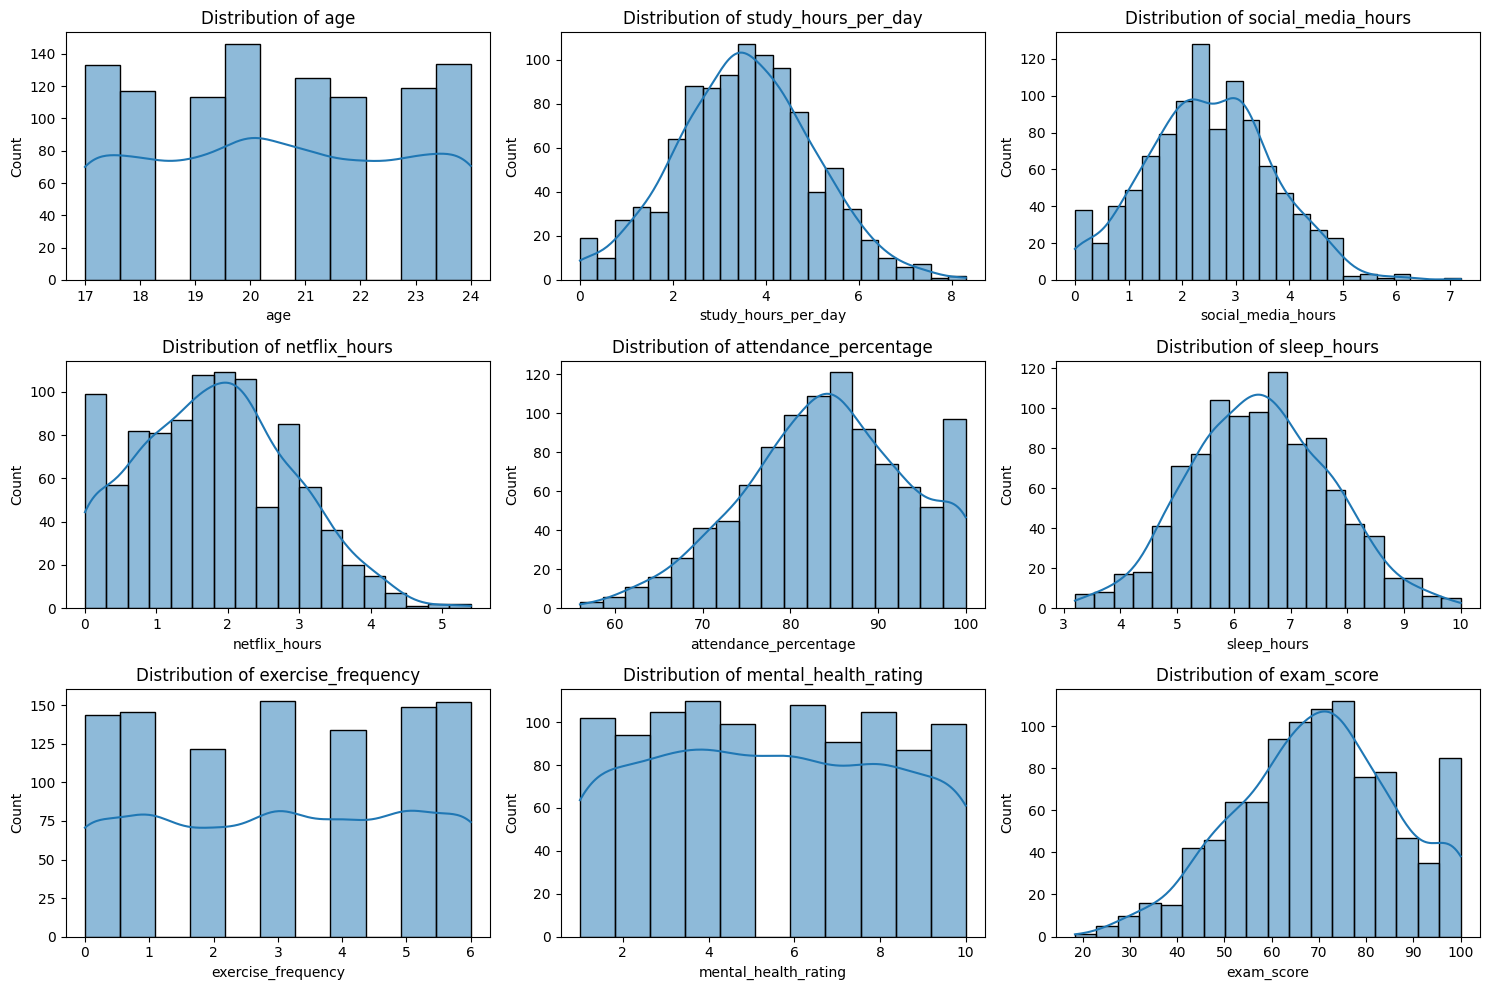

In [140]:
# Visuaslisasi distribusi fitur numerik
numeric_features = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


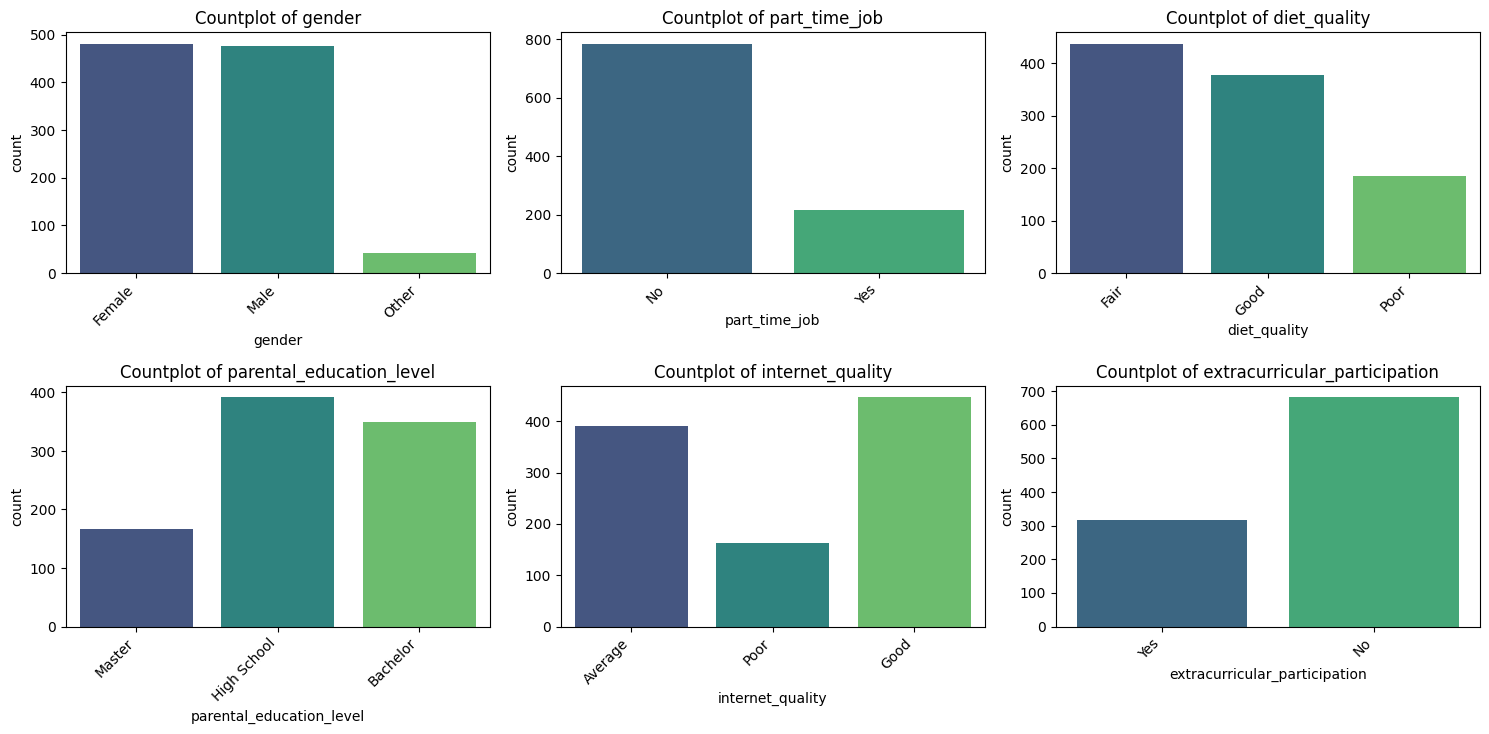

In [141]:
#visualisasi fitur kategorikal
categorical_features = df.select_dtypes(include='object').columns
categorical_features = categorical_features.drop('student_id') # Exclude student_id
# Assuming df and categorical_features are already defined
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False) # Modified line
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

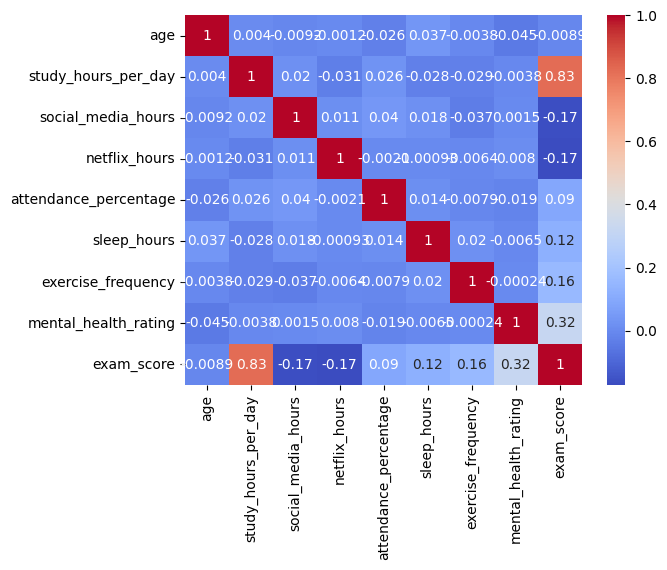

In [142]:
# Visualisasi Heatmap
numerical_df = df.select_dtypes(include=np.number)

# Calculate and plot the correlation matrix for numerical features
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

<ipython-input-143-691047edeeea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='gender', y='exam_score', inner='quartile', palette='viridis')


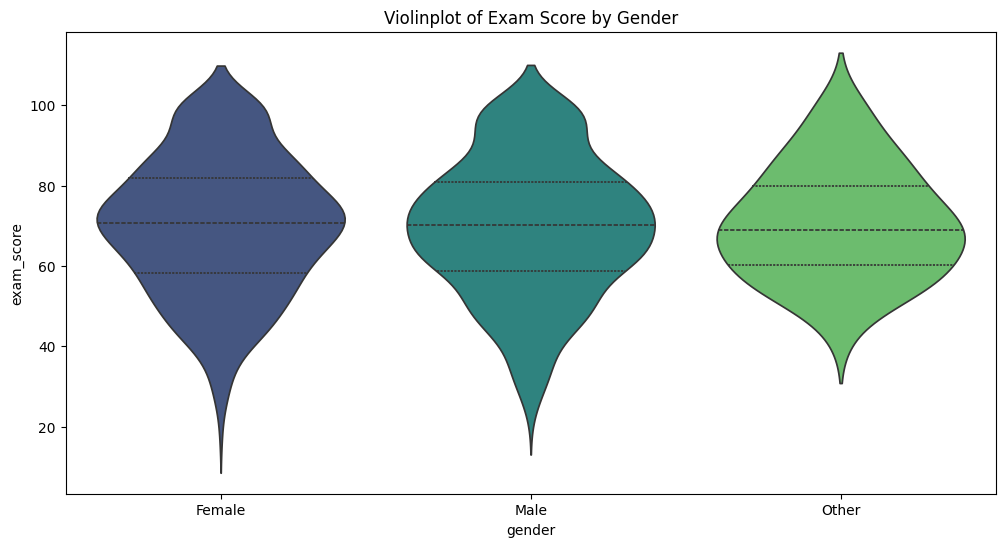

In [143]:
#sebaran examp_score  berdasarkan gender.

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='gender', y='exam_score', inner='quartile', palette='viridis')
plt.title('Violinplot of Exam Score by Gender')
plt.show()


#Data Preparation

##Memahami struktur data

In [144]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [146]:
df.duplicated().sum()

np.int64(0)

In [147]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


Terdapat 91 missing value pada parental_education_level

### Menangani missing value pada kolom pareantal education level

In [148]:
#imputasi dengan modus (mode)

mode_parental_education = df['parental_education_level'].mode()[0]
df['parental_education_level'].fillna(mode_parental_education, inplace=True)
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


<ipython-input-148-d56412167336>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna(mode_parental_education, inplace=True)


Menghapus kolom yang tidak digunakan. Dalam dataframe ini kolom student_id tidak diperlukan

In [149]:
df.drop(['student_id'], axis=1, inplace=True)
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Melakukan one hot encoding pada fitur kategorikal


In [150]:
# Melakukan one hot encoding pada fitur kategorikal
categorical_features = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality','extracurricular_participation']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [151]:
#Memisahkan fitur dan target
# Define features (X) and target (y)
# The target variable is 'exam_score'
X = df.drop('exam_score', axis=1)
y = df['exam_score']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeatures (X) sample:")
print(X.head())
print("\nTarget (y) sample:")
print(y.head())

Features (X) shape: (1000, 18)
Target (y) shape: (1000,)

Features (X) sample:
   age  study_hours_per_day  social_media_hours  netflix_hours  \
0   23                  0.0                 1.2            1.1   
1   20                  6.9                 2.8            2.3   
2   21                  1.4                 3.1            1.3   
3   23                  1.0                 3.9            1.0   
4   19                  5.0                 4.4            0.5   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   85.0          8.0                   6   
1                   97.3          4.6                   6   
2                   94.8          8.0                   1   
3                   71.0          9.2                   4   
4                   90.9          4.9                   3   

   mental_health_rating  gender_Male  gender_Other  part_time_job_Yes  \
0                     8        False         False              False   
1          

### Split Data Training dan Testing

In [152]:
#80% Data Training, 20% Data Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nX_train sample:")
print(X_train.head())
print("\ny_train sample:")
print(y_train.head())

X_train shape: (800, 18)
X_test shape: (200, 18)
y_train shape: (800,)
y_test shape: (200,)

X_train sample:
     age  study_hours_per_day  social_media_hours  netflix_hours  \
29    20                  2.0                 3.2            3.8   
535   22                  6.4                 4.2            1.5   
695   20                  2.5                 1.9            1.6   
557   22                  3.8                 3.6            4.3   
836   19                  3.5                 2.8            0.0   

     attendance_percentage  sleep_hours  exercise_frequency  \
29                    82.6          6.7                   6   
535                   88.8          6.1                   0   
695                   93.6          7.0                   4   
557                  100.0          7.3                   1   
836                   92.0          3.8                   5   

     mental_health_rating  gender_Male  gender_Other  part_time_job_Yes  \
29                     10   

#Modelling

## Linear Regression


In [153]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

## Random Forest Regression



In [154]:
## hyper parameter tuning dengan gridsearch
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [155]:
rf_model = grid_search.best_estimator_
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

#Model Evaluation

In [160]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

In [161]:
print("Model Evaluation:")
print("Linear Regression:")
lr_mae, lr_rmse, lr_r2 = evaluate_model(lr_model, X_test, y_test)
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R2 Score:", lr_r2)

print("\nRandom Forest Regression:")
rf_mae, rf_rmse, rf_r2 = evaluate_model(rf_model, X_test, y_test)
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2 Score:", rf_r2)


Model Evaluation:
Linear Regression:
MAE: 4.192343110379916
RMSE: 5.150974183986892
R2 Score: 0.8965307156715967

Random Forest Regression:
MAE: 4.966886666666666
RMSE: 6.2081937784762395
R2 Score: 0.8496985303449688


In [158]:
#Test Model terbaik
best_model = rf_model

new_student_data = {}
# Populate with example data, ensuring all columns from X_train are present.
# For numerical columns, provide a single value in a list.
new_student_data['age'] = [20]  # Example value for age
new_student_data['study_hours_per_day'] = [4]  # Example value
new_student_data['attendance_percentage'] = [95] # Example value
new_student_data['social_media_hours'] = [2] # Example value for social media hours
new_student_data['netflix_hours'] = [1] # Example value for netflix hours
new_student_data['sleep_hours'] = [7] # Example value for sleep hours
new_student_data['exercise_frequency'] = [3] # Example value for exercise frequency (e.g., times per week)
new_student_data['test_prep'] = [1] # Example: 1 for completed, 0 for not completed (assuming binary)
new_student_data['sleep_hours_per_night'] = [7] # This seems redundant with 'sleep_hours', double-check your features. Assuming 'sleep_hours' is correct feature.
new_student_data['mental_health_rating'] = [4] # Example value (e.g., on a scale)


# For one-hot encoded categorical columns, set the appropriate one to 1 and others to 0.
# Ensure all possible categories that appeared in training data are covered.
new_student_data['gender_Male'] = [1] # 1 for Male, 0 for Female
new_student_data['gender_Other'] = [0] # Assuming 'Other' was also a category

new_student_data['part_time_job_Yes'] = [0] # 1 for Yes, 0 for No

# Assuming diet_quality had 'Good', 'Poor', and potentially others in training
new_student_data['diet_quality_Good'] = [0] # Example: 1 for Good, 0 for other categories
new_student_data['diet_quality_Poor'] = [1] # Example: 1 for Poor, 0 for other categories

# Assuming parental_education_level had 'High School', 'None', 'Primary School', 'University', 'Master' in training
new_student_data['parental_education_level_High School'] = [1]
new_student_data['parental_education_level_None'] = [0]
new_student_data['parental_education_level_Primary School'] = [0]
new_student_data['parental_education_level_University'] = [0]
new_student_data['parental_education_level_Master'] = [0]

# Assuming internet_quality had 'Poor', 'Very Good', 'Good' in training
new_student_data['internet_quality_Poor'] = [0]
new_student_data['internet_quality_Very Good'] = [0]
new_student_data['internet_quality_Good'] = [1]


new_student_data['extracurricular_participation_Yes'] = [1] # 1 for Yes, 0 for No


# Convert the sample data into a DataFrame
new_student_df = pd.DataFrame(new_student_data)
new_student_df = new_student_df.reindex(columns=X_train.columns, fill_value=0)


# Make a prediction for the new student
predicted_score = best_model.predict(new_student_df)

print("\nPredicted Exam Score for the new student:", predicted_score[0])


Predicted Exam Score for the new student: 74.48199999999996
